In [1]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/08 08:02:28 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
spark_df = spark.read.csv('Database/CardiovascularDisease/CVD_unclean.csv', header=True)

In [3]:
from pyspark.sql.functions import col

spark_df = spark_df.withColumn("Alcohol_Consumption", col("Alcohol_Consumption").cast("int"))
spark_df = spark_df.withColumn("Height_(cm)", col("Height_(cm)").cast("int"))
spark_df = spark_df.withColumn("Weight_(kg)", col("Weight_(kg)").cast("float"))
spark_df = spark_df.withColumn("BMI", col("BMI").cast("float"))
spark_df = spark_df.withColumn("Height_(cm)", col("Height_(cm)").cast("int"))
spark_df = spark_df.withColumn("Fruit_Consumption", col("Fruit_Consumption").cast("int"))
spark_df = spark_df.withColumn("Green_Vegetables_Consumption", col("Green_Vegetables_Consumption").cast("int"))
spark_df = spark_df.withColumn("FriedPotato_Consumption", col("FriedPotato_Consumption").cast("int"))

spark_df.show(5)

+--------------+--------------------+--------+-------------+-----------+------------+----------+--------+---------+------+------------+-----------+-----------+-----+---------------+-------------------+-----------------+----------------------------+-----------------------+
|General_Health|             Checkup|Exercise|Heart_Disease|Skin_Cancer|Other_Cancer|Depression|Diabetes|Arthritis|   Sex|Age_Category|Height_(cm)|Weight_(kg)|  BMI|Smoking_History|Alcohol_Consumption|Fruit_Consumption|Green_Vegetables_Consumption|FriedPotato_Consumption|
+--------------+--------------------+--------+-------------+-----------+------------+----------+--------+---------+------+------------+-----------+-----------+-----+---------------+-------------------+-----------------+----------------------------+-----------------------+
|          Poor|Within the past 2...|      No|           No|         No|          No|        No|      No|      Yes|Female|       70-74|        150|      32.66|14.54|            Yes|

In [4]:
from pyspark.sql.functions import col, sum
spark_cleaned_df = spark_df.na.drop()
null_counts = spark_cleaned_df.select([sum(col(c).isNull().cast("int")).alias(c) for c in spark_cleaned_df.columns])

null_counts.show()

+--------------+-------+--------+-------------+-----------+------------+----------+--------+---------+---+------------+-----------+-----------+---+---------------+-------------------+-----------------+----------------------------+-----------------------+
|General_Health|Checkup|Exercise|Heart_Disease|Skin_Cancer|Other_Cancer|Depression|Diabetes|Arthritis|Sex|Age_Category|Height_(cm)|Weight_(kg)|BMI|Smoking_History|Alcohol_Consumption|Fruit_Consumption|Green_Vegetables_Consumption|FriedPotato_Consumption|
+--------------+-------+--------+-------------+-----------+------------+----------+--------+---------+---+------------+-----------+-----------+---+---------------+-------------------+-----------------+----------------------------+-----------------------+
|             0|      0|       0|            0|          0|           0|         0|       0|        0|  0|           0|          0|          0|  0|              0|                  0|                0|                           0|     

In [5]:
from pyspark.sql.functions import when, col

# Construct the Health_Status
spark_cleaned_constructed_df = spark_cleaned_df.withColumn(
  'Health_Status',
  when(col('BMI') < 18.5, "Underweight")
  .when((col('BMI') >= 18.5) & (col('BMI') <= 24.9), "Normal")
  .when((col('BMI') >= 25) & (col('BMI') <= 29.9), "Overweight")
  .otherwise("Obese")
)


# Construct the Alcohol_Consumption_Status
spark_cleaned_constructed_df = spark_cleaned_constructed_df.withColumn(
  'Alcohol_Consumption_Status',
  when(col('Alcohol_Consumption') == 0 , "Zero Alcohol Consumption")
  .when(col('Alcohol_Consumption') <= 7.5 , "Low Alcohol Consumption")
  .when((col('Alcohol_Consumption') > 7.5) & (col('Alcohol_Consumption') <= 15),"Medium Alcohol Consumption")
  .when((col('Alcohol_Consumption') > 15) & (col('Alcohol_Consumption') <= 22.5), "High Alcohol Consumption")
  .otherwise("Excess Alcohol Consumption")
)

# Construct the Fruit_Consumption_Status
spark_cleaned_constructed_df = spark_cleaned_constructed_df.withColumn(
  'Fruit_Consumption_Status',
  when(col('Fruit_Consumption') == 0 , "Zero Fruit Consumption")
  .when(col('Fruit_Consumption') <= 30 , "Low Fruit Consumption")
  .when((col('Fruit_Consumption') > 30) & (col('Fruit_Consumption') <= 60),"Medium Fruit Consumption")
  .when((col('Fruit_Consumption') > 60) & (col('Fruit_Consumption') <= 90), "High Fruit Consumption")
  .otherwise("Excess Fruit Consumption")
)

# Construct the FriedPotato_Consumption_Status
spark_cleaned_constructed_df = spark_cleaned_constructed_df.withColumn(
  'FriedPotato_Consumption_Status',
  when(col('FriedPotato_Consumption') == 0 , "Zero Fried Potato Consumption")
  .when(col('FriedPotato_Consumption') <= 30 , "Low Fried Potato Consumption")
  .when((col('FriedPotato_Consumption') > 30) & (col('FriedPotato_Consumption') <= 60),"Medium Fried Potato Consumption")
  .when((col('FriedPotato_Consumption') > 60) & (col('FriedPotato_Consumption') <= 90), "High Fried Potato Consumption")
  .otherwise("Excess Fried Potato Consumption")
)

# Construct the Green_Vegetables_Consumption_Status
spark_cleaned_constructed_df = spark_cleaned_constructed_df.withColumn(
  'Green_Vegetables_Consumption_Status',
  when(col('Green_Vegetables_Consumption') == 0 , "Zero Green Vegetable Consumption")
  .when(col('Green_Vegetables_Consumption') <= 30 , "Low Green Vegetable Consumption")
  .when((col('Green_Vegetables_Consumption') > 30) & (col('Green_Vegetables_Consumption') <= 60),"Medium Green Vegetable Consumption")
  .when((col('Green_Vegetables_Consumption') > 60) & (col('Green_Vegetables_Consumption') <= 90), "High Green Vegetable Consumption")
  .otherwise("Excess Green Vegetable Consumption")
)

spark_cleaned_constructed_df.show(5)

+--------------+--------------------+--------+-------------+-----------+------------+----------+--------+---------+------+------------+-----------+-----------+-----+---------------+-------------------+-----------------+----------------------------+-----------------------+-------------+--------------------------+------------------------+------------------------------+-----------------------------------+
|General_Health|             Checkup|Exercise|Heart_Disease|Skin_Cancer|Other_Cancer|Depression|Diabetes|Arthritis|   Sex|Age_Category|Height_(cm)|Weight_(kg)|  BMI|Smoking_History|Alcohol_Consumption|Fruit_Consumption|Green_Vegetables_Consumption|FriedPotato_Consumption|Health_Status|Alcohol_Consumption_Status|Fruit_Consumption_Status|FriedPotato_Consumption_Status|Green_Vegetables_Consumption_Status|
+--------------+--------------------+--------+-------------+-----------+------------+----------+--------+---------+------+------------+-----------+-----------+-----+---------------+-------

In [6]:
# Drop useless variable

# BMI is better than weight and height
spark_cleaned_constructed_df = spark_cleaned_constructed_df.drop(col('Weight_(kg)'))
spark_cleaned_constructed_df = spark_cleaned_constructed_df.drop(col('Height_(cm)'))

spark_cleaned_constructed_df = spark_cleaned_constructed_df.drop(col('Alcohol_Consumption'))
spark_cleaned_constructed_df = spark_cleaned_constructed_df.drop(col('BMI'))
spark_cleaned_constructed_df = spark_cleaned_constructed_df.drop(col('Fruit_Consumption'))
spark_cleaned_constructed_df = spark_cleaned_constructed_df.drop(col('FriedPotato_Consumption_Status'))
spark_cleaned_constructed_df = spark_cleaned_constructed_df.drop(col('Green_Vegetables_Consumption'))

spark_cleaned_constructed_df.show(5)

+--------------+--------------------+--------+-------------+-----------+------------+----------+--------+---------+------+------------+---------------+-----------------------+-------------+--------------------------+------------------------+-----------------------------------+
|General_Health|             Checkup|Exercise|Heart_Disease|Skin_Cancer|Other_Cancer|Depression|Diabetes|Arthritis|   Sex|Age_Category|Smoking_History|FriedPotato_Consumption|Health_Status|Alcohol_Consumption_Status|Fruit_Consumption_Status|Green_Vegetables_Consumption_Status|
+--------------+--------------------+--------+-------------+-----------+------------+----------+--------+---------+------+------------+---------------+-----------------------+-------------+--------------------------+------------------------+-----------------------------------+
|          Poor|Within the past 2...|      No|           No|         No|          No|        No|      No|      Yes|Female|       70-74|            Yes|               

<AxesSubplot:ylabel='Heart_Disease'>

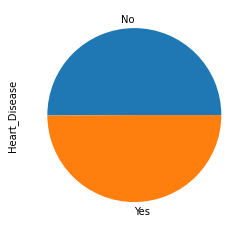

In [7]:
# under-sampling method 
count_class_0 = spark_cleaned_constructed_df.filter(spark_cleaned_constructed_df['Heart_Disease'] == "Yes").count()
count_class_1 = spark_cleaned_constructed_df.filter(spark_cleaned_constructed_df['Heart_Disease'] == "No").count()


fraction = count_class_0 / float(count_class_1)
df_class_1_under = spark_cleaned_constructed_df.filter(spark_cleaned_constructed_df['Heart_Disease'] == "No").sample(False, fraction)
df_balanced = df_class_1_under.unionAll(spark_cleaned_constructed_df.filter(spark_cleaned_constructed_df['Heart_Disease'] == "Yes"))

df_balanced_pandas = df_balanced.toPandas()
df_balanced_pandas['Heart_Disease'].value_counts().plot.pie()

In [8]:

from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
# Label-encoding method for target variable
df_balanced = df_balanced.withColumn("Heart_Disease_Encoded", 
                   when(col("Heart_Disease") == "Yes", 1)
                   .when(col("Heart_Disease") == "No", 0)
                   .cast('int')
                   )
df_balanced = df_balanced.drop('Heart_Disease')

# One-Hot encoding Method
string_cols = [t[0] for t in df_balanced.dtypes if t[1] == 'string' and t[0] != 'Heart_Disease']

indexers = [StringIndexer(inputCol=c, outputCol=c+"_index") for c in string_cols]
encoders = [OneHotEncoder(inputCol=c+"_index", outputCol=c+"_ohe") for c in string_cols]

ohe_cols = [col for col in df_balanced.columns if col.endswith("_ohe")]

assembler = VectorAssembler(inputCols=ohe_cols, outputCol="features")




In [9]:
df_balanced.show(5)

+--------------+--------------------+--------+-----------+------------+----------+--------------------+---------+------+------------+---------------+-----------------------+-------------+--------------------------+------------------------+-----------------------------------+---------------------+
|General_Health|             Checkup|Exercise|Skin_Cancer|Other_Cancer|Depression|            Diabetes|Arthritis|   Sex|Age_Category|Smoking_History|FriedPotato_Consumption|Health_Status|Alcohol_Consumption_Status|Fruit_Consumption_Status|Green_Vegetables_Consumption_Status|Heart_Disease_Encoded|
+--------------+--------------------+--------+-----------+------------+----------+--------------------+---------+------+------------+---------------+-----------------------+-------------+--------------------------+------------------------+-----------------------------------+---------------------+
|          Good|Within the past year|      No|         No|          No|        No|                  No|   

In [10]:
ohe_cols

[]